# Candlestick Tristar

https://www.investopedia.com/terms/t/tri-star.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'DTN'
start = '2021-01-01'
end = '2021-10-22'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,83.989998,83.989998,82.300003,82.629997,81.084007,8400
2021-01-05,82.769997,83.639999,82.589996,83.260002,81.702209,16500
2021-01-06,83.440002,85.570000,83.440002,85.180000,83.586304,26500
2021-01-07,85.300003,85.400002,84.910004,85.129997,83.537224,6600
2021-01-08,85.250000,85.250000,84.610001,85.029999,83.439102,5900


## Candlestick with Tristar

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,737794.0,83.989998,83.989998,82.300003,82.629997,81.084007,8400,False
1,737795.0,82.769997,83.639999,82.589996,83.260002,81.702209,16500,False
2,737796.0,83.440002,85.570000,83.440002,85.180000,83.586304,26500,True
3,737797.0,85.300003,85.400002,84.910004,85.129997,83.537224,6600,False
4,737798.0,85.250000,85.250000,84.610001,85.029999,83.439102,5900,False


Text(0, 0.5, 'Price')

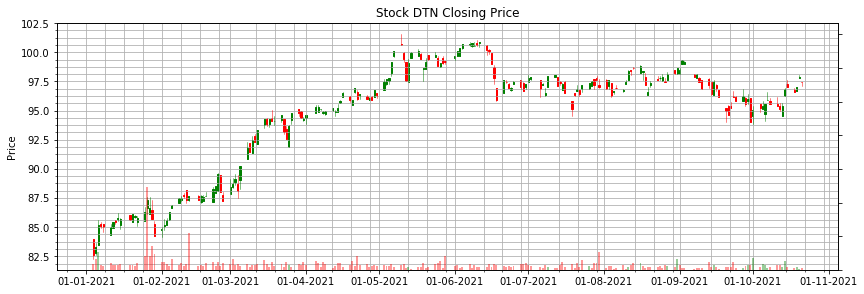

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
tristar = talib.CDLTRISTAR(df['Open'], df['High'], df['Low'], df['Close'])

tristar = tristar[tristar != 0]

In [6]:
df['tristar'] = talib.CDLTRISTAR(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['tristar'] !=0]

,Open,High,Low,Close,Adj Close,Volume,tristar
Date,,,,,,,
2021-08-09,96.690002,96.860001,96.589996,96.739998,96.184715,7400,-100


In [8]:
df['Adj Close'].loc[df['tristar'] !=0]

Date
2021-08-09    96.184715
Name: Adj Close, dtype: float64

In [9]:
df['tristar'].loc[df['tristar'] !=0].index

DatetimeIndex(['2021-08-09'], dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
tristar

Date
2021-08-09   -100
dtype: int32

In [11]:
tristar.index

DatetimeIndex(['2021-08-09'], dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,tristar
Date,,,,,,,
2021-01-04,83.989998,83.989998,82.300003,82.629997,81.084007,8400,0
2021-01-05,82.769997,83.639999,82.589996,83.260002,81.702209,16500,0
2021-01-06,83.440002,85.570000,83.440002,85.180000,83.586304,26500,0
2021-01-07,85.300003,85.400002,84.910004,85.129997,83.537224,6600,0
2021-01-08,85.250000,85.250000,84.610001,85.029999,83.439102,5900,0
...,...,...,...,...,...,...,...
2021-10-15,97.309998,97.599998,97.029999,97.029999,97.029999,4200,0
2021-10-18,96.800003,96.889999,96.570000,96.580002,96.580002,2400,0
2021-10-19,96.709999,97.040001,96.680000,97.000000,97.000000,4100,0


Text(0, 0.5, 'Price')

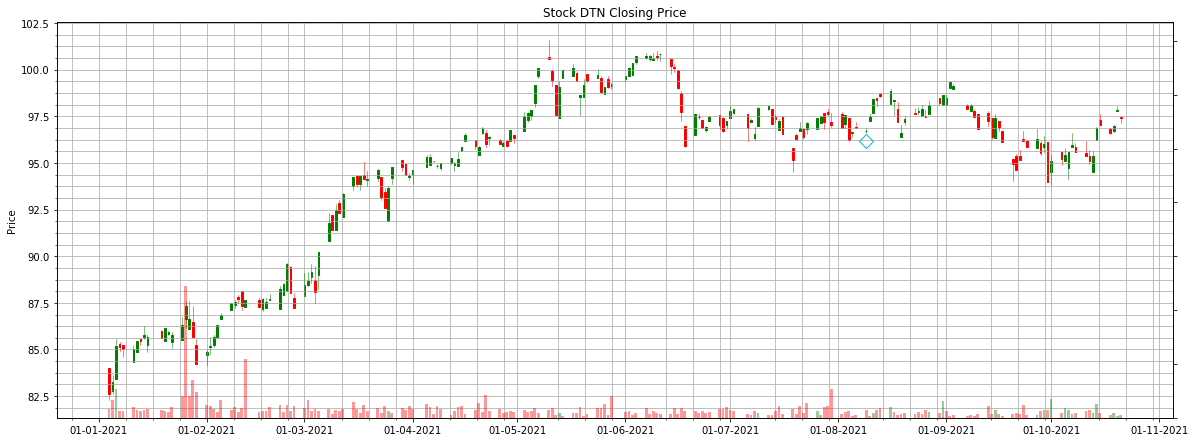

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['tristar'] !=0].index, df['Adj Close'].loc[df['tristar'] !=0],
                'Dc', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-08-01':'2021-09-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,tristar,VolumePositive
0,738004.0,97.650002,97.720001,96.870003,96.870003,96.313972,3400,0,False
1,738005.0,97.099998,97.580002,96.870003,97.580002,97.019897,5100,0,False
2,738006.0,97.389999,97.389999,96.180000,96.220001,95.667702,6000,0,False
3,738007.0,96.629997,96.639999,96.389999,96.639999,96.085289,1800,0,False
4,738008.0,96.940002,97.199997,96.889999,96.889999,96.333855,2500,0,False


Text(0, 0.5, 'Price')

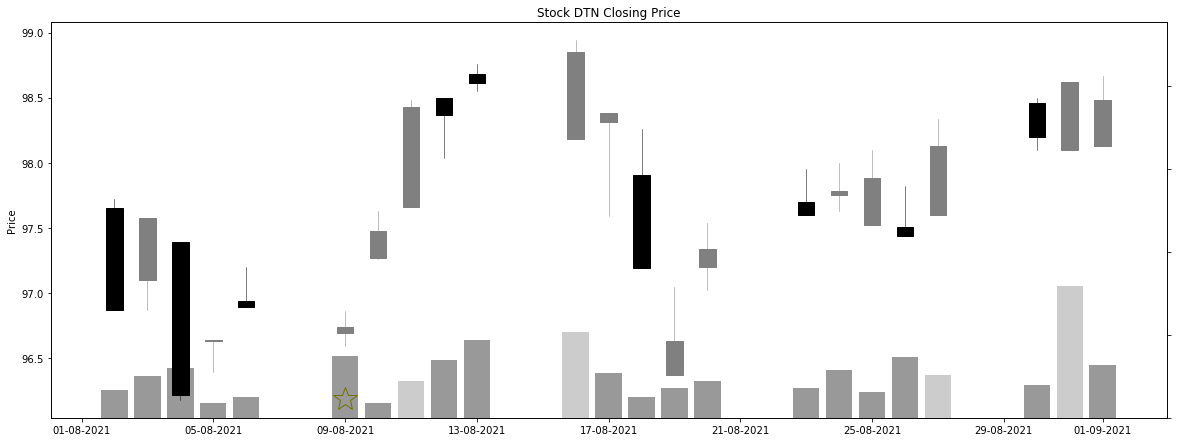

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('white')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='grey', colordown='black', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['tristar'] !=0].index, df['Adj Close'].loc[df['tristar'] !=0],
                '*y', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=25.0) 
colors = dfc.VolumePositive.map({True: 'grey', False: 'black'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

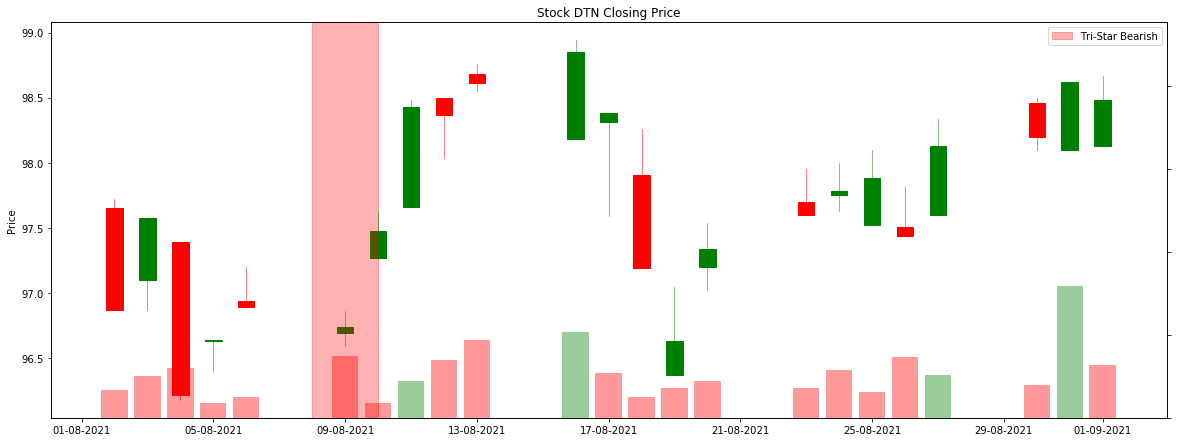

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,8,8)), date2num(datetime(2021,8,10)), 
           label="Tri-Star Bearish",color="red", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')